**Datenbankänderungen**

*Aufgabenblatt*

*Sommersemester 2021*


----
**Einführung**
In diesem Übungsabschnitt betrachten wir die Änderungen von bestehenden Datensätzen einer Datenbank mittels des UPDATE-Befehls von SQL. Unser Übungsszenario in diesem Abschnitt ist die Pflege einer eigenen Tabelle der 2. Fußall-Bundesliga. Wir besitzen eine Datenbank, in der alle Änderungen bin einschließlich zum 13. Spieltag eingepflegt sind. Die Ausgangsdaten sind im Moodle-Kurs verfügbar und die Tabelle in ihrer Ausgangsform ist zudem auch im Anhang enthalten.
Wir werden nun die (fiktiven) Ergebnisse des 14. Spieltags in diese Tabelle einarbeiten. Hierfür müssen die Daten für jeden Verein aktualisiert werden, wenn dieser Verein eine Partie bestritten hat. Im Verlaufe des Spieltags werden wir unterschiedliche Techniken diskutieren, wie man Änderungen an der Datenbank vornehmen kann und diese als Übung durchführen.

**Vorbereitung**
Nutzen Sie für die nachfolgenden Aufgaben die bereits installierte SQLite Datenbank, mit der von Ihnen präferierten Option der Interaktion (z.B. SQLite Kommandointerpreter, DataGrip, etc.). Laden Sie sich zudem das Datenfile 2liga.db aus dem Moodle-Kurs herunter. Die Datenbank enthält die aktuelle Tabelle der 2. Liga. Das Schema hat lediglich eine Tabelle tabelle, welche wir für alle Veränderungen nutzen werden. Machen Sie sich
wie immer ein wenig mit den verschiedenen Spalten der Tabelle vertraut. Tabelle 1 enthält eine Beschreibung der entsprechenden Spalten.

In [1]:
%load_ext sql
%sql sqlite:///2liga.db

'Connected: @2liga.db'

**Tabelle 1: Beschreibung der Tabelle "tabelle"**
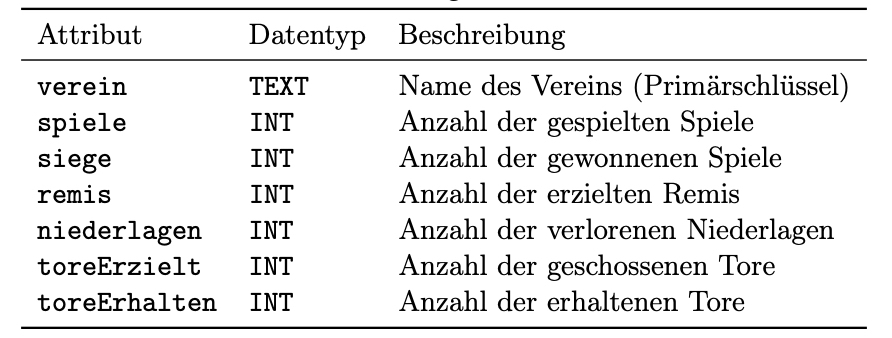

**Syntax**

Änderungen an bestehenden Datensätzen einer Tabelle werden mit Hilfe des UPDATE-Befehls implemetiert. Die allgemeine Syntax des Befehls ist in Listing 1 dargestellt.

**Listing 1: SQL Syntax des UPDATE-Befehls**
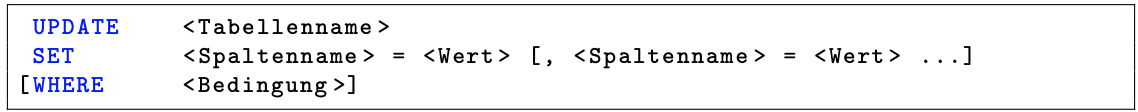

Wie bereits besprochen wirkt der Befehl grundsätzlich auf *alle* Datensätze einer Tabelle. Einschränkungen auf eine bestimmte Menge von Datensätzen können über eine WHERE-Bedingung realisiert werden. Der Aufbau und die Wirkung von WHERE ist dabei identisch mit der Wirkung im bereits kennengelernten SELECT-Befehl.

Da jede Datenbank möglicherweise vom SQL-Standard abweichende oder zusätzliche Befehlsoptionen implementieren kann, ist es immer hilfreich, auch die Syntaxreferenz des Datenbankherstellers zu kennen. Im Listing 1 wird beispielsweise die Syntax der Datenbank SQLite dargestellt.

**Die Freitagsspiele**
Die ersten beide Spiele des 14. Spieltags sind gespielt. Unsere Tabelle muss nun entsprechend aktualisiert werden:

*Tabelle 2: 14 Spieltag, Freitagsspiele*
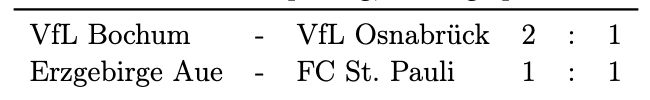

*   Die Anzahl der gespielten Spiele (spiele) muss für alle Vereine, die ein Spiel absolviert haben, angepasst werden.
*   Je nach Ausgang des Spiels (Sieg, Remis oder Niederlage) muss der entsprechende Wert (siege, remis, niederlagen) für den jeweiligen Verein angepasst werden.
*   Die Anzahl der geschossenen Tore (toreErzielt) und die Anzahl der erhaltenen
Gegentreffer (toreErhalten) muss für die jeweiligen Verein angepasst werden.

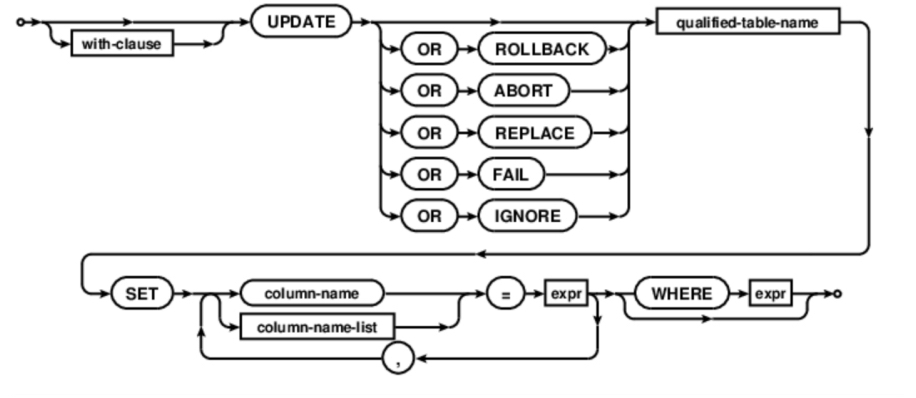
Abbildung 1: SQLite Syntax für den UPDATE-Befehl[2]

Es gibt mehrere Möglichkeiten, wie diese Änderungen umgesetzt werden können. Nachfolgend werden beide vorgestellt.





**Variante 1: Statische Aktualisierung**

Um die neuen Werte der Vereine aus der ersten Partie, Bochum gegen Osnabrück, in der
Datenbank zu speichern, können wir den UPDATE-Befehl der SQL-Sprache verwenden.
Wie im Abschnitt „Syntax“ beschrieben, besteht der Befehl aus drei Teilen: der Angabe
der zu aktualisierenden Tabelle, die Angabe, welche Attribute auf welche neuen Werte
zu setzen sind, und eine optionale Angabe von Bedingungen, die erfüllt sein müssen,
damit ein Datensatz aktualisiert wird. Der erste Teil, die zu aktualisierende Tabelle,
ist in unserem Fall einfach zu beantworten: es handelt sich um die Tabelle "tabelle".
Betrachten wir nachfolgend die beiden anderen Teile.
Zunächst müssen wir wissen, welche Attribute auf welche neuen Werte gesetzt werden
sollen. In unserem Beispiel müssen mehrere Attribute verändert werden. Beide Vereine,
VfL Bochum und VfL Osnabrück, haben ein Spiel absolviert, daher muss die Anzahl der
gespielten Partien um eins erhöht werden. Da Bochum als Sieger aus der Begegnung hervorging, ist dem Verein ein zusätzlicher Sieg gutzuschreiben, während für den Verlierer,
Osnabrück, eine zusätzliche Niederlage vermerkt werden muss. Zudem muss die Anzahl
der jeweils erzielten Treffer und erhaltenen Gegentreffer um 2 bzw. 1 erhöht werden.
Um all diese Veränderungen über den UPDATE-Befehl spezifizieren zu können, lesen wir
zu erst die aktuellen Werte über den SELECT-Befehl aus. Kennen wir die aktuellen Werte,
dann sind wir in der Lage, die neuen Werte zu berechnen und können diese schließlich
in den SET-Teil des UPDATE-Befehls einsetzen. Um nur genau die Werte der beiden Vereine auszulesen, können wir eine entsprechende WHERE-Bedingung definieren.1 Hinweis:
Bei dieser und bei allen nachfolgenden Abfragen ist die Groß- und Kleinschreibung von
Zeichenketten zu beachten.

In [2]:
%%sql
--Ermitteln der aktuellen Werte

SELECT * FROM tabelle
WHERE verein like 'Vfl Bochum'
OR verein like 'Vfl Osnabrück';

 * sqlite:///2liga.db
(sqlite3.OperationalError) no such table: tabelle
[SQL: --Ermitteln der aktuellen Werte

SELECT * FROM tabelle
WHERE verein like 'Vfl Bochum'
OR verein like 'Vfl Osnabrück';]
(Background on this error at: http://sqlalche.me/e/14/e3q8)


Das Ergebnis der Abfrage ist in Tabelle 3 dargestellt.
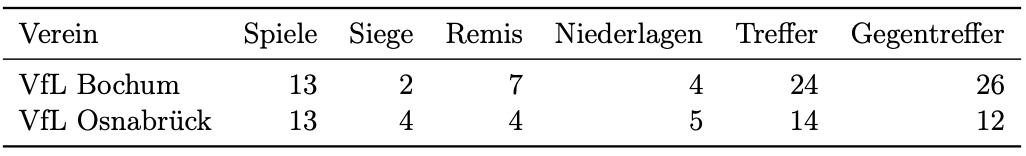

Tabelle 3: Ergebnisse der Abfrage

Mit diesen Informationen können wir nun die neuen Werte errechnen, die für die beiden
Vereine in unsere Datenbank geschrieben werden sollen. So haben beispielsweise beide
Vereine einen neuen Zielwert von 14 für das Attribut spiele, welches die gespielten
Partien angibt. Dieser Wert errechnet sich aus der Anzahl der bisher gespielten Spiele
(13), zu der wir 1 hinzuzählen für die gerade gespielte Partie des 14. Spieltags. Analog
dazu können auch alle anderen Werte berechnet werden.
Nachfolgend zwei UPDATE-Befehle, welche die Änderungen des ersten Spiels in unsere
Datenbank übertragen

In [ ]:
%%sql
--UPDATE-Befehl für das Spiel Bochum-Osnabrück

UPDATE tabelle
SET spiele = 14 ,
  siege = 3 ,
  toreErzielt = 26 ,
  toreErhalten = 27
WHERE verein = "VfL Bochum ";
UPDATE tabelle
SET spiele = 14 ,
  niederlagen = 6 ,
  toreErzielt = 15 ,
  toreErhalten = 14
WHERE verein = "VfL Osnabrück";

Nach Ausführung dieser beiden Anweisungen sind die Werte für die beiden Vereine
aktualisiert und reflektieren nun die gespielte Partie des 14. Spieltags. Die Verwendung von statischen Werten für die Aktualisierung ist recht intuitiv – wahrscheinlich wäre man
ohne Datenbank ähnlich vorgegangen und hätte sich zu erst die Tabelle des 13. Spieltags
besorgt, um dann die entsprechenden Änderungen zu berechnen und einzupflegen. Wie
wir jedoch in der nachfolgenden Variante 2 sehen werden, kann man die Änderung auch
etwas komfortabler und effizienter umsetzen.

**Variante 2: Dynamische Aktualisierung**

Der große Nachteil von Variante 1 ist, dass sie zwei Interaktionen mit dem Datenbanksystem erfordert: Zu erst lesen wir die aktuellen Datensätze und dann schreiben wir die
neuen, selbst berechneten Daten zurück. Dies kann mit SQL glücklicherweise auch effizienter gemacht werden, indem man die Berechnungsvorschrift für den neuen Wert in
den UPDATE-Befehl aufnimmt. Anstelle eines statischen neuen Wert übergibt man daher
im SET-Block eine Formel, wie der neue Wert zu berechnen ist. Dabei kann man auf die
aktuellen Werte des zu verändernden Datensatzes zugreifen, indem man das jeweilige
Attribut verwendet.
Auf diese Weise lässt sich das zweite Freitagsspiel, Aue gegen St. Pauli, mit nur einem
SQL-Befehl in die Datenbank übertragen. Da das Spiel zudem unentschieden endete,
ist auch das UPDATE-Statement etwas kompakter, da die gleichen Änderungen für beide
Vereine gemacht werden. Listing 4 zeigt den entsprechenden Befehl.

In [ ]:
%%sql
--UPDATE-Befehl für das Spiel Aue - St. Pauli

UPDATE tabelle
SET spiele = spiele + 1 ,
remis = remis + 1 ,
toreErzielt = toreErzielt + 1,
toreErhalten = toreErhalten + 1
WHERE verein = " Erzgebirge Aue"
OR verein = "FC St. Pauli ";

Ein Vorteil dieser Vorgehensweise ist, dass das DBMS die Berechnung der neuen Werte
übernimmt und wir daher auch keinen Fehler machen können. Selbst bei trivialen Berechnungen wie diesen kann ein Mensch schnell mal eine Zeile verrutschen und daher mit
den falschen Werten rechnen, was dem DBMS nicht passiert.
Dieser Vorteil geht mit einer kleinen Einschränkung einher: Während Variante 1 idempotent ist, ist Variante 2 das nicht. Das bedeutet, Variante 1 kann mehrmals ausgeführt
werden und hinterlässt die betreffenden Datensätze immer im gleichen Zustand. Bei Variante 2 ist dies nicht mehr der Fall. Jede Ausführung des dynamischen UPDATE-Befehls
fügt der Datenbank ein weiteres Remis zwischen Aue und St. Pauli hinzu. In der Regel
ist dies unproblematisch, da ein Spiel nur einmal hinzugefügt werden soll und das zugehörige SQL-Statement daher nur einmal ausgeführt wird. In anderen Einsatzbereichen
kann dieser Unterschied jedoch bedeutend sein.

**Die Samstagsspiele**

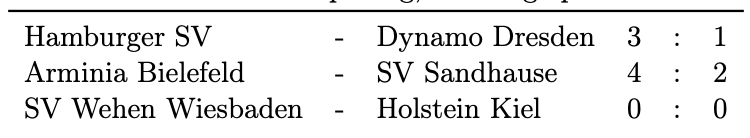

Tabelle 4: 14. Spieltag Samstagsspiele

Am Samstag werden nun drei weitere Partien des 14. Spieltags gespielt. Erneut muss
unsere Tabelle entsprechend aktualisiert werden.


**Transaktionen**

Bei dieser Gelegenheit möchten wir uns einem Detail widmen, das wir bei der Übernahme der Freitagsspiele noch ignoriert haben. Bei der Pflege der ersten Begegnung des
Freitags, Bochum gegen Osnabrück, haben wir die Aktualisierung der Datenbank auf
zwei UPDATE-Befehle aufgeteilt: Zu erst haben wir den Datensatz für den VfL Bochum
angepasst und dann den für den VfL Osnabrück. Da unsere kleine Datenbank lediglich
einen einzelnen Benutzer hat, war dieses Vorgehen akzeptabel. Für größere Datenbanken, die im Mehrbenutzerbetrieb laufen, wäre dieser Ansatz jedoch problematisch. Denn
selbst wenn wir die beiden UPDATE-Befehle möglichst schnell hintereinander ausführen,
so besteht das Risiko, dass ein anderer Anwender die Daten genau zu einem Zeitpunkt
zwischen den beiden Befehlen ausliest. Für diesen Anwender wären die Daten dann inkonsistent, denn ein Spiel wäre für lediglich einen Verein aktualisiert, nicht jedoch für
den anderen. Daher wären eine Reihe von Integritätsregeln, die für eine Fußballtabelle
gelten müssen, verletzt, zum Beispiel:

*   Die Gesamtsumme der gespielten Spiele und der Remis muss immer gerade sein.
*   Die Gesamtsumme der Siege muss gleich der Gesamtsumme der Niederlagen sein.
*   Die Gesamtsumme der erzielten Tore muss gleich der Gesamtsumme der erhaltenen
Tore sein.

Das Risiko mag in unserem Beispiel immer noch überschaubar sein, denn letztendlich geht es „nur“ um Fußball. Dennoch sollten wir in der Lage sein zu vermeiden, dass
Benutzer unserer Datenbank ein inkonsistentes Ergebnis erhalten, wenn wir eine Kette
von SQL-Befehlen durchführen wollen und diese als Ganzes auf der Datenbank verbucht
werden sollen.
Glücklicherweise ist dies mit SQL auch problemlos möglich. Eine solche Kette von
SQL-Befehlen, die als eine Einheit auf der Datenbank verbucht werden, nennt man eine Datenbank-Transaktion. Jedes SQL-konforme Datenbanksystem muss Transaktionen unterstützen. Als Nutzer eines Datenbanksystems muss man lediglich dem DBMS mitteilen, wenn eine neue Transaktion beginnen soll. Ab diesem Zeitpunkt werden SQL-Befehle
nicht mehr direkt verbucht, sondern „gesammelt“. Der Benutzer hat die Möglichkeit, eine Transaktion abzuschließen oder zu verwerfen. Das Verwerfen würde die gesammelten
Änderungen einfach löschen, ohne sie auf der Datenbank zu verbuchen. Das Abschließen
hingegen sorgt dafür, dass alle gesammelten Änderungen an der Datenbank nun wirksam werden. Das DBMS wendet hierbei das alles-oder-nichts Prinzip an: Sollte es bei
der Verbuchung der Änderungen zu einem Fehler kommen, zum Beispiel weil eine Integritätsbedingung verletzt wird, so wird keine der Änderungen verbucht. Damit wird
sichergestellt, dass die Transaktion als Ganzes auf die Datenbank geschrieben wird, oder
eben gar nicht. Dies würde in unserem Beispiel bedeuten, dass eine Partie entweder für
beide Vereine korrekt geschrieben werden kann, oder überhaupt nicht. Genau dieses Verhalten der Datenbank bei der Transaktionsverbuchung stellt sicher, dass unsere FußballTabelle immer in einem konsistenten Zustand ist und unsere Integritätsregeln eingehalten
werden. Der gleiche Mechanismus kommt selbstverständlich auch bei anderen Szenarien,
wie zum Beispiel Kontenbewegungen und Finanztransaktionen zum Einsatz. Listing 5
zeigt den prinzipiellen Aufbau einer Datenbanktransaktion in SQLite. Literatur [1] enthält weitere
Informationen zur Syntax des Transaktionsmanagements von SQLite.

In [ ]:
%%sql
--Starten und Verbuchen einer Datenbanktransaktion in SQLite

-- Start einer Transaktion :
BEGIN TRANSACTION;
-- Datenbankänderungen - sind für andere Benutzer nicht
-- sichtbar , bis die Transaktion beendet wird
UPDATE ...;
INSERT ...;
DELETE ...;
-- Transaktion abschließen und verbuchen :
COMMIT TRANSACTION;


Auf diese Weise können wir nun das erste Samstagsspiel, Hamburg gegen Dresden,
als geschützte Transaktion in unsere Tabelle übernehmen. Hierfür umgeben wir lediglich
unsere beiden UPDATE-Befehle mit einem Block, der durch BEGIN TRANSACTION beginnt
und durch COMMIT TRANSACTION endet. Die Änderungen an den beiden Datensätzen von
Hamburg und Dresden führen wir, wie in Variante 2 der Freitagsspiele, in jeweils einem
Schritt durch. Listing 6 zeigt eine mögliche Lösung.
Anmerkung: Wir haben bereits zuvor Transaktionen verwendet, ohne das zu bemerken.
SQLite erzeugt für jede Änderung (also für alle DML-Anweisungen) implizit eine Transaktion, wenn dies nicht explizit durch BEGIN TRANSACTION gemacht wurde. Die implizit
erzeugte Transaktion wird jedoch automatisch verbucht, wenn der letzte SQL-Befehl im
Befehlspuffer abgearbeitet wurde.

In [ ]:
%%sql
--Verbuchen des Spiels HSV - Dresden als Transaktion

BEGIN TRANSACTION ;
UPDATE tabelle
SET spiele = spiele + 1 ,
siege = siege + 1 ,
toreErzielt = toreErzielt + 3 ,
toreErhalten = toreErhalten + 1
WHERE verein = " Hamburger SV";
UPDATE tabelle
SET spiele = spiele + 1 ,
niederlagen = niederlagen + 1 ,
toreErzielt = toreErzielt + 1 ,
toreErhalten = toreErhalten + 3
WHERE verein = " Dynamo Dresden ";
COMMIT TRANSACTION ;

**Aufgabe:**

Übertragen Sie die beiden verbleibenden Partien Bielefeld - Sandhausen und
Wiesbaden - Kiel in unsere Datenbank. Stellen Sie dabei sicher, dass die Änderung in
eine Transaktion eingebettet ist und es somit nicht zu Inkonsistenzen kommen kann.

In [ ]:
%%sql
--Aufgabe zur Übertragung der verbleibenden Partien
-- Bielefeld - Sandhausen
BEGIN TRANSACTION;

UPDATE tabelle
SET spiele = spiele + 1,
    siege = siege + 1,
    toreErzielt = toreErzielt + 4,
    toreErhalten = toreErhalten + 2
WHERE verein = "Arminia Bielefeld";

UPDATE tabelle
SET spiele = spiele + 1,
    niederlagen = niederlagen + 1,
    toreErzielt = toreErzielt + 2,
    toreErhalten = toreErhalten + 4
WHERE verein = "SV Sandhausen";

COMMIT TRANSACTION;

In [ ]:
%%sql
-- Wiesbaden-Kiel
-- Wiesbaden - Kiel (nur ein UPDATE, keine explizite Transaktion notwendig)
UPDATE tabelle
SET spiele = spiele + 1,
    remis = remis + 1
WHERE verein = "SV Wehen Wiesbaden"
   OR verein = "Holstein Kiel";

**Die Sonntagsspiele**

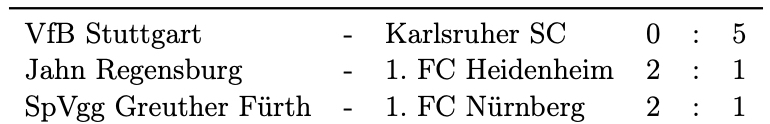

Tabelle 5: 14. Spieltag, Sonntagsspiele

Am Sonntag werden wiederum drei weitere Partien des 14. Spieltags gespielt, unter anderem das Baden-Württemberg-Derby zwischen dem VfB Stuttgart und dem Karlsruher
SC. Erneut muss unsere Tabelle entsprechend aktualisiert werden.

**Aufgabe:**

Übertragen Sie die erste Sonntagspartie Stuttgart - Karlsruhe transaktionssicher in unsere Datenbank.

In [ ]:
%%sql
--Aufgabe zur Übertragung der Sonntagspartie
-- VfB - KSC
BEGIN TRANSACTION;

UPDATE tabelle
SET spiele = spiele + 1,
    niederlagen = niederlagen + 1,
    toreErhalten = toreErhalten + 5
WHERE verein = "VfB Stuttgart";

UPDATE tabelle
SET spiele = spiele + 1,
    siege = siege + 1,
    toreErzielt = toreErzielt + 5
WHERE verein = "Karlsruher SC";

COMMIT TRANSACTION;

**Aufgabe:**

Übertragen Sie die beiden verbleibenden Partien Regensburg - Heidenheim
und Fürth - Nürnberg transaktionssicher in unsere Datenbank. Da beide Begegnungen
gleich endeten, können Sie mit insgesamt lediglich zwei UPDATE-Befehlen für beide Patien
auskommen.

In [ ]:
%%sql
-- Aufgabe zur Übertragung der Partie Regenugburg-Heidenheim
-- verbleibende Sonntagsspiele mit nur 2 UPDATEs, da gleiches Ergebnis
BEGIN TRANSACTION;

UPDATE tabelle
SET spiele = spiele + 1,
    siege = siege + 1,
    toreErzielt = toreErzielt + 2,
    toreErhalten = toreErhalten + 1
WHERE verein IN ("Jahn Regensburg", "SpVgg Greuther Fürth");

UPDATE tabelle
SET spiele = spiele + 1,
    niederlagen = niederlagen + 1,
    toreErzielt = toreErzielt + 1,
    toreErhalten = toreErhalten + 2
WHERE verein IN ("1. FC Heidenheim", "1. FC Nürnberg");

COMMIT TRANSACTION;

**Das Montagsspiel**

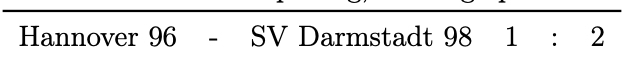

Tabelle 6: 14. Spieltag, Montagsspiel

Abgerundet wird der Spieltag durch die letzte Partie am Montag, die Begegnung Hannover - Darmstadt. Nach diesem Spiel haben alle Vereine 14 Partien gespielt. Ein letztes
Mal muss daher unsere Tabelle für diesen Spieltag aktualisiert werden.

**Aufgabe:**

Übertragen Sie die letzte Partie des Spieltags zwischen Hannover und Darmstadt transaktionssicher in unsere Datenbank.

In [ ]:
%%sql
--Aufgabe zur Übertragung der letzten Partie
-- Hannover - Darmstadt
BEGIN TRANSACTION;

UPDATE tabelle
SET spiele = spiele + 1,
    niederlagen = niederlagen + 1,
    toreErzielt = toreErzielt + 1,
    toreErhalten = toreErhalten + 2
WHERE verein = "Hannover 96";

UPDATE tabelle
SET spiele = spiele + 1,
    siege = siege + 1,
    toreErzielt = toreErzielt + 2,
    toreErhalten = toreErhalten + 1
WHERE verein = "SV Darmstadt 98";

COMMIT TRANSACTION;

**Zusatzaufgabe**

Unsere Datenbank ist jetzt inhaltlich korrekt, zeigt jedoch die Tabelle noch nicht in
der richtigen Reihenfolge an. Eine Fußballtabelle ist nach Punkten und der Tordifferenz
absteigend sortiert:

*   Punkte. Je Sieg bekommt ein Verein drei Punkte, je Unentschieden einen Punkt.
*   Tordifferenz. Die erzielten Tore abzüglich der erhaltenen Tore (kann auch negativ
sein).



**Aufgabe:**

 Schreiben Sie eine SELECT-Abfrage, welche die Tabelle in der korrekten Sortierung ausgibt und zusätzlich zu den vorhandenen Informationen auch die erzielten Punkte
und die Tordifferenz je Verein anzeigt.

In [ ]:
%%sql
--Aufgabe zur Sortierung
SELECT *, toreErzielt - toreErhalten AS differenz, siege * 3 + remis AS punkte
FROM tabelle
ORDER BY punkte DESC, differenz DESC;

**Bonus-Challenge:**

Lob und Ehre gebühren dem- oder derjenigen, der/die es schafft,
zudem noch die Platzierung mit auszugeben.

In [ ]:
%%sql
--Bonus-Challenge:
WITH tbl AS (
   SELECT *, toreErzielt - toreErhalten AS differenz, siege * 3 + remis AS punkte
   FROM tabelle
   ORDER BY punkte DESC, differenz DESC )
SELECT ROW_NUMBER() OVER(ORDER BY punkte DESC, differenz DESC) AS platz, * FROM tbl;

**Literatur:**

[1] SQLite Consortium. SQLite SQL Syntax Reference – Begin Transaction Statement.
url: https://www.sqlite.org/lang_transaction.html (besucht am 18. 11. 2019).

[2] SQLite Consortium. SQLite SQL Syntax Reference – Update Statement. url: https:
//sqlite.org/lang_update.html (besucht am 18. 11. 2019).

**Anhang**

*Ausgangssituation (nach dem 13. Spieltag)*

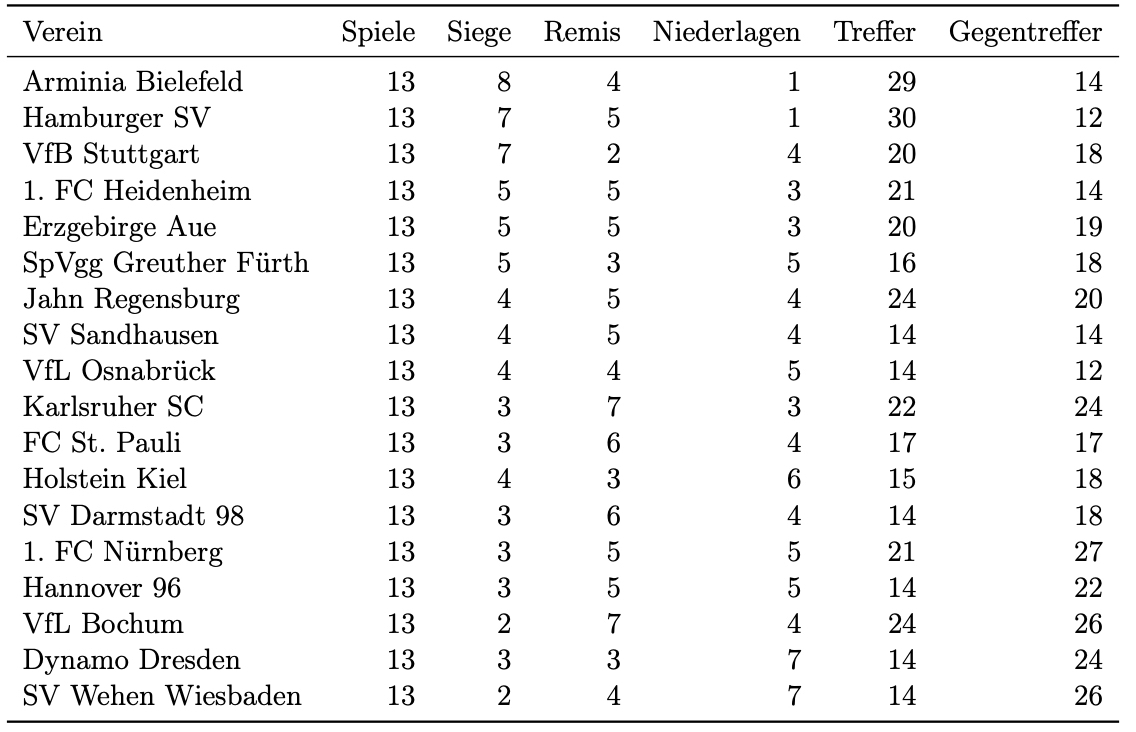

Tabelle 7: Ausgangssituation

*Endsituation (nach dem 14. Spieltag)*

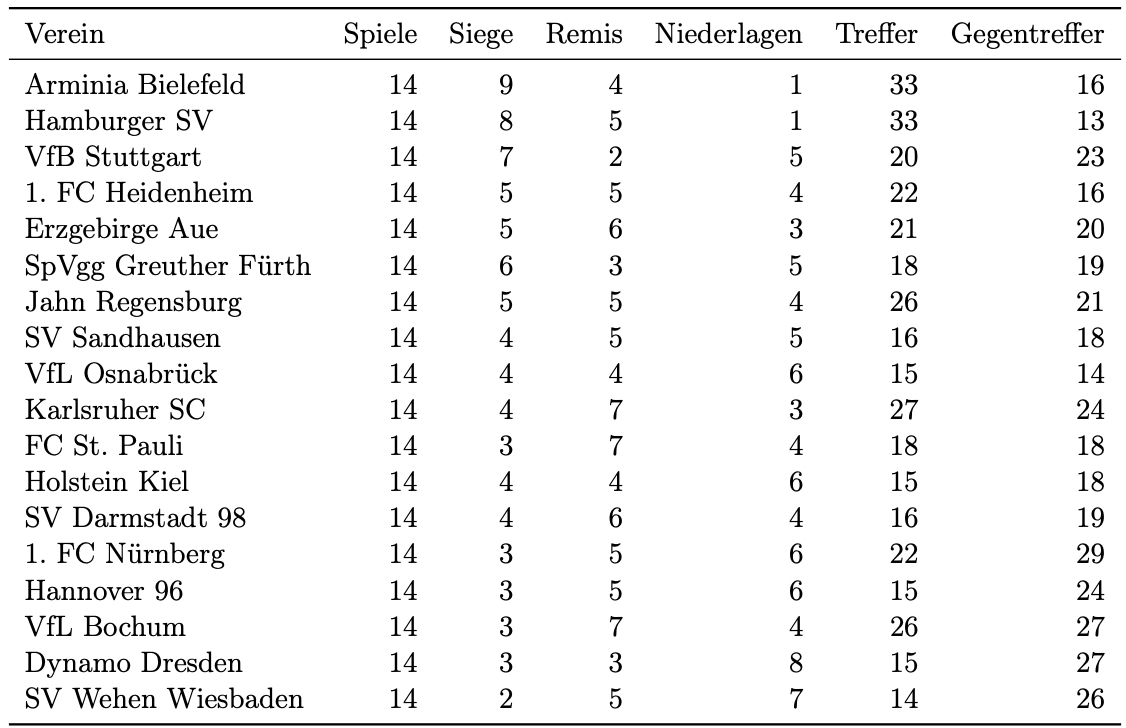

Tabelle 8: Endsituation, nach Übernahme aller Spiele des 14. Spieltags

